In [2]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point,Polygon

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

ModuleNotFoundError: No module named 'missingno'

In [1]:
colcountry = geopandas.read_file("MGN2012_MUNICIPIO_URBANCLUSTERS.shp")

NameError: name 'geopandas' is not defined

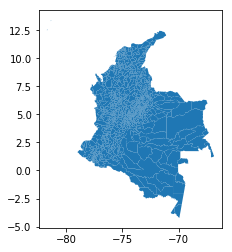

In [132]:
colcountry.plot()

In [51]:
colcountry.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 41 columns):
DPTO_DPTO_    997 non-null object
MPIO_CCDGO    1122 non-null object
MPIO_CNMBR    1122 non-null object
MPIO_CRSLC    1122 non-null object
MPIO_NANO_    1122 non-null int64
MPIO_NAREA    1122 non-null float64
MPIO_CSMBL    1122 non-null object
MPIO_CCNCT    1122 non-null object
MPIO_NANO     1122 non-null int64
DPTO_CCDGO    125 non-null object
ENTIDAD_TE    1122 non-null object
CODANEDEP     1122 non-null object
MUNICIPIO     1122 non-null object
Departam_1    1122 non-null object
location_j    1122 non-null object
Match_DANE    1122 non-null float64
DANE_DP       1122 non-null object
DANE_DPNOM    1122 non-null object
DANE_DPMP     1122 non-null object
DANE_MPIO     1122 non-null object
Tot_2016      1122 non-null float64
CAB_2016      1122 non-null float64
REST_2016     1122 non-null float64
link          1122 non-null object
table1_lev    1122 non-null object
table1_ID

In [52]:
colcountry.head()

,DPTO_DPTO_,MPIO_CCDGO,MPIO_CNMBR,MPIO_CRSLC,MPIO_NANO_,MPIO_NAREA,MPIO_CSMBL,MPIO_CCNCT,MPIO_NANO,DPTO_CCDGO,...,table3_COR,urb_cntr,urb_cntr_n,poly_com15,poly15_nam,poly15,poly_com10,poly10_nam,poly10,geometry
0,97,001,MITU,Decreto Nal 1666 del 6 de Agosto de 1974,1993,16162.071359,4,97001,2012,None,...,None,97001.0,None,97001.0,None,97001.0,97001.0,None,97001.0,POLYGON ((-70.48343523814566 1.797714400099551...
1,97,161,CARURU,Ordenanza 003 del 7 de Agosto de 1993,1993,7037.189230,4,97161,2012,None,...,None,97161.0,None,97161.0,None,97161.0,97161.0,None,97161.0,POLYGON ((-71.38721771292705 1.735508169166735...
2,97,511,PACOA,1967,1993,13840.157045,4,97511,2012,None,...,None,97511.0,None,97511.0,None,97511.0,97511.0,None,97511.0,POLYGON ((-71.81461307703182 0.896092067195184...
3,97,666,TARAIRA,Ordenanza 22 del 27 de Noviembre de 1992,1993,6479.809987,4,97666,2012,None,...,None,97666.0,None,97666.0,None,97666.0,97666.0,None,97666.0,POLYGON ((-70.01931736320569 -0.20302881812540...
4,97,777,PAPUNAHUA,1977,1993,5324.030099,4,97777,2012,None,...,None,97777.0,None,97777.0,None,97777.0,97777.0,None,97777.0,POLYGON ((-70.10473684263116 2.078839450880025...


In [53]:
colcountry["geometry"].head()

0    POLYGON ((-70.48343523814566 1.797714400099551...
1    POLYGON ((-71.38721771292705 1.735508169166735...
2    POLYGON ((-71.81461307703182 0.896092067195184...
3    POLYGON ((-70.01931736320569 -0.20302881812540...
4    POLYGON ((-70.10473684263116 2.078839450880025...
Name: geometry, dtype: object

In [57]:
pd.set_option('display.max_colwidth',-1)

In [58]:
colcountry["geometry"].head()

0    POLYGON ((-70.48343523814566 1.797714400099551, -70.48289369698648 1.797713323611049, -70.48216109126133 1.797941442043964, -70.48116264683864 1.797665861890039, -70.48102472501103 1.797666148773772, -70.48088794262441 1.797665887071105, -70.48033769872575 1.797527704440029, -70.47984266600616 1.797253134224832, -70.47947648275346 1.79702393120948, -70.47924757921237 1.797115433630381, -70.47820172972598 1.796428521559051, -70.47660693136476 1.795511507150366, -70.47528787323671 1.794641281769771, -70.47350965994281 1.793496006835312, -70.47232672679695 1.792397606364489, -70.47132810790583 1.791070544270269, -70.47077796742923 1.789743828414998, -70.46991624423924 1.787226807671061, -70.46928290837945 1.785443014083853, -70.4688711133112 1.785030959111509, -70.46860342380893 1.784893352945915, -70.46828312036968 1.784710513579398, -70.46701084677312 1.784572037769351, -70.4658184968261 1.784844944238841, -70.46427062329059 1.787450228944977, -70.46395027398592 1.787861373803423, 

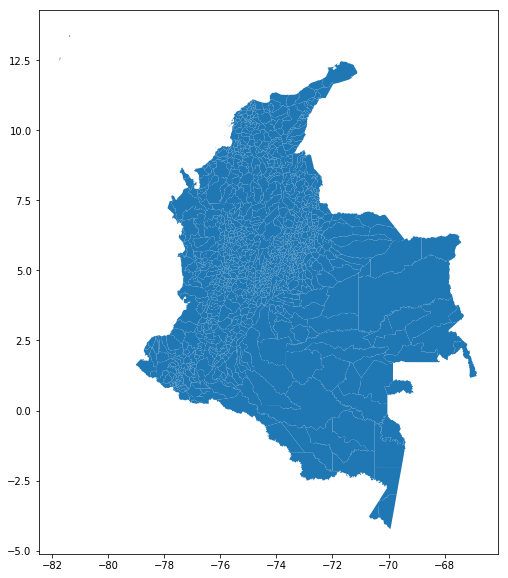

In [59]:
colcountry.plot(figsize=(20,10))

In [75]:
pd.reset_option('^display')

In [76]:
colcountry.head()

,DPTO_DPTO_,MPIO_CCDGO,MPIO_CNMBR,MPIO_CRSLC,MPIO_NANO_,MPIO_NAREA,MPIO_CSMBL,MPIO_CCNCT,MPIO_NANO,DPTO_CCDGO,...,table3_COR,urb_cntr,urb_cntr_n,poly_com15,poly15_nam,poly15,poly_com10,poly10_nam,poly10,geometry
0,97,001,MITU,Decreto Nal 1666 del 6 de Agosto de 1974,1993,16162.071359,4,97001,2012,None,...,None,97001.0,None,97001.0,None,97001.0,97001.0,None,97001.0,POLYGON ((-70.48343523814566 1.797714400099551...
1,97,161,CARURU,Ordenanza 003 del 7 de Agosto de 1993,1993,7037.189230,4,97161,2012,None,...,None,97161.0,None,97161.0,None,97161.0,97161.0,None,97161.0,POLYGON ((-71.38721771292705 1.735508169166735...
2,97,511,PACOA,1967,1993,13840.157045,4,97511,2012,None,...,None,97511.0,None,97511.0,None,97511.0,97511.0,None,97511.0,POLYGON ((-71.81461307703182 0.896092067195184...
3,97,666,TARAIRA,Ordenanza 22 del 27 de Noviembre de 1992,1993,6479.809987,4,97666,2012,None,...,None,97666.0,None,97666.0,None,97666.0,97666.0,None,97666.0,POLYGON ((-70.01931736320569 -0.20302881812540...
4,97,777,PAPUNAHUA,1977,1993,5324.030099,4,97777,2012,None,...,None,97777.0,None,97777.0,None,97777.0,97777.0,None,97777.0,POLYGON ((-70.10473684263116 2.078839450880025...


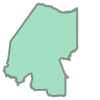

In [77]:
colcountry['geometry'][0]

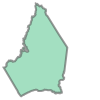

In [78]:
colcountry['geometry'][1]

In [85]:
pd.set_option('display.max_rows',1200)

In [88]:
print(colcountry['MPIO_CNMBR'].sort_values())

994                       ABEJORRAL
300                          ABREGO
995                       ABRIAQUÃ
404                         ACACIAS
515                          ACANDI
478                         ACEVEDO
924                            ACHI
479                          AGRADO
544                    AGUA DE DIOS
691                       AGUACHICA
187                          AGUADA
774                         AGUADAS
46                          AGUAZUL
692                 AGUSTIN CODAZZI
480                            AIPE
545                           ALBAN
340                           ALBAN
188                         ALBANIA
463                         ALBANIA
758                         ALBANIA
72                           ALCALA
341                          ALDANA
996                     ALEJANDRÃA
433                       ALGARROBO
481                       ALGECIRAS
716                        ALMAGUER
801                         ALMEIDA
114                       AL

In [94]:
colcountry.loc[[945]]

,DPTO_DPTO_,MPIO_CCDGO,MPIO_CNMBR,MPIO_CRSLC,MPIO_NANO_,MPIO_NAREA,MPIO_CSMBL,MPIO_CCNCT,MPIO_NANO,DPTO_CCDGO,...,table3_COR,urb_cntr,urb_cntr_n,poly_com15,poly15_nam,poly15,poly_com10,poly10_nam,poly10,geometry
945,13,473,MORALES,Decreto 312 de Diciembre 4 de 1886,1993,1342.147172,4,13473,2012,None,...,None,13473.0,None,13473.0,None,13473.0,13473.0,None,13473.0,POLYGON ((-73.87483614327334 8.473708010816097...


In [95]:
colcountry.loc[[736]]

,DPTO_DPTO_,MPIO_CCDGO,MPIO_CNMBR,MPIO_CRSLC,MPIO_NANO_,MPIO_NAREA,MPIO_CSMBL,MPIO_CCNCT,MPIO_NANO,DPTO_CCDGO,...,table3_COR,urb_cntr,urb_cntr_n,poly_com15,poly15_nam,poly15,poly_com10,poly10_nam,poly10,geometry
736,19,473,MORALES,1915,1993,495.475588,4,19473,2012,None,...,None,19473.0,None,19473.0,None,19473.0,19473.0,None,19473.0,POLYGON ((-76.83468966189832 2.972572590852451...


In [128]:
bp = Point(-75.5546,6.31108)
for index, row in colcountry.iterrows():
    if bp.within(row['geometry']):
        print("found in row ",index)
        print(colcountry.iloc[index])

found in row  1011
DPTO_DPTO_                                                 None
MPIO_CCDGO                                                  088
MPIO_CNMBR                                                BELLO
MPIO_CRSLC                  Ordenanza 48 del 29 deAbril de 1913
MPIO_NANO_                                                 1993
MPIO_NAREA                                              142.718
MPIO_CSMBL                                                    4
MPIO_CCNCT                                                05088
MPIO_NANO                                                  2012
DPTO_CCDGO                                                   05
ENTIDAD_TE                                   Cabecera Municipal
CODANEDEP                                                     5
MUNICIPIO                                                 Bello
Departam_1                                            Antioquia
location_j                             Colombia-Antioquia-Bello
Match_DANE           